In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## EDA student performance indiactor
## Problem statement : 
### This project understands how the students performance(test score) is affected by other variables such as gender, Ethnicity, Parental level of education, Lunch and Test prepration course.

In [4]:
# Read the dataset
df=pd.read_csv('stud.csv')

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

In [8]:
# check missing value.
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## Insights or observation
### There are no missing value

In [10]:
## check Duplicates
df.duplicated().sum()

0

### There are no duplicates values in the dataset

In [11]:
# check datatypes
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
# checking the number of unique values if each colums.
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [14]:
# check teh statistics of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
## Insights or observation
### From the above description of numberical data, all means are very close to each other.
### ALll the standard deviation are also close-between 14.6 to 15.19
### while there is a minimum of 0 for math , other are having 17 and 10 value.

In [21]:
obj_list=df.dtypes[df.dtypes=='object'].index

In [24]:
obj_list

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [31]:
# segrration of numerical and categorical feature in the columns.
object_feature=[feature for feature in df.columns if df[feature].dtypes=='object']

In [32]:
object_feature

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [33]:
numerical_feature=[feature for feature in df.columns if df[feature].dtypes!='object']

In [34]:
numerical_feature

['math_score', 'reading_score', 'writing_score']

In [35]:
df['race_ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64

In [36]:
# Aggregate the total score with mean
df['total_score']=(df['math_score']+df['reading_score']+df['reading_score'])

In [39]:
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,216,72.000000
1,female,group C,some college,standard,completed,69,90,88,249,83.000000
2,female,group B,master's degree,standard,none,90,95,93,280,93.333333
3,male,group A,associate's degree,free/reduced,none,47,57,44,161,53.666667
4,male,group C,some college,standard,none,76,78,75,232,77.333333


<AxesSubplot: xlabel='average', ylabel='Count'>

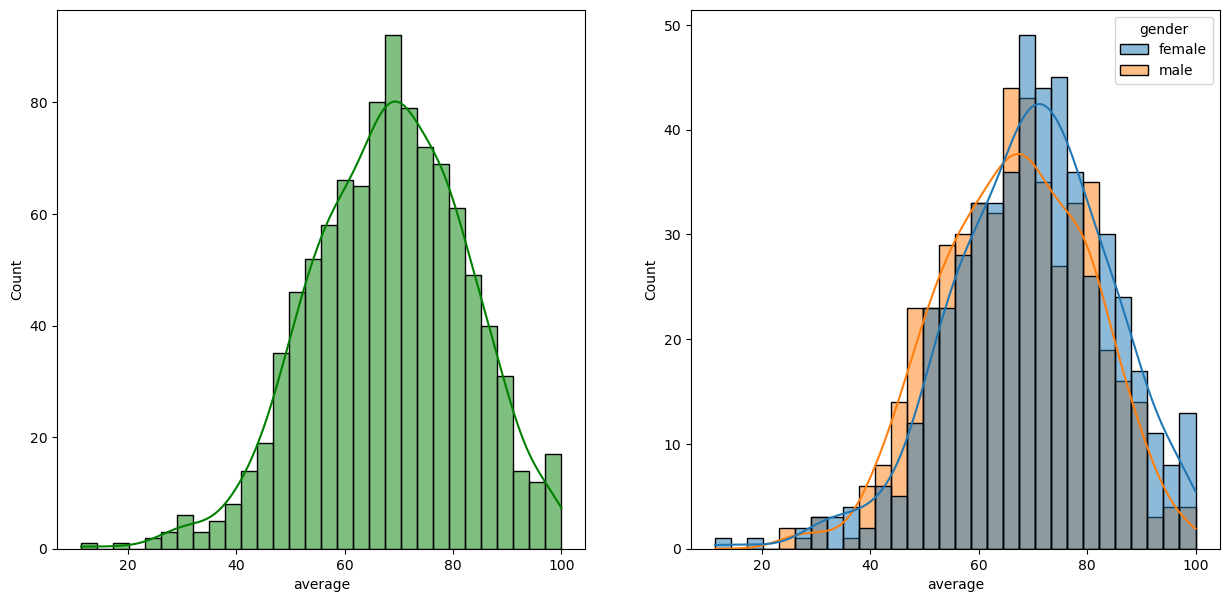

In [43]:
## Explore more visualization
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121) # first 1 mean 1 row , 2 means 2 colums, ans last 1 means write in first row
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender')

## Insights
### Female student tend to perfome well then male students.

<AxesSubplot: xlabel='average', ylabel='Count'>

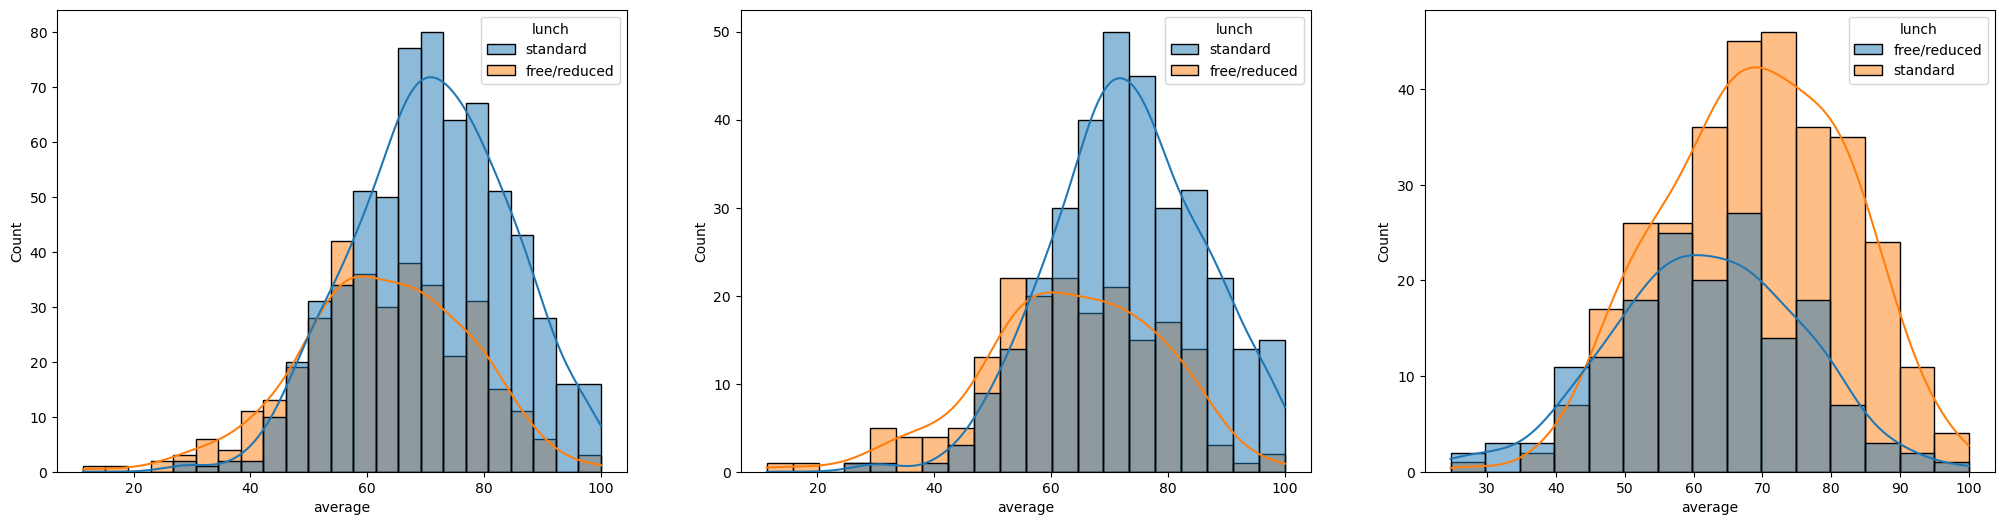

In [51]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')

# Insights: student having standard lunch have averge score is much more good than free/reduced.

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')

# insights: also female students havaing standard lunch have average score is better than free/reduced lunch.

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')

## standard lunch helps students to perfome well in exams

<AxesSubplot: xlabel='average', ylabel='Count'>

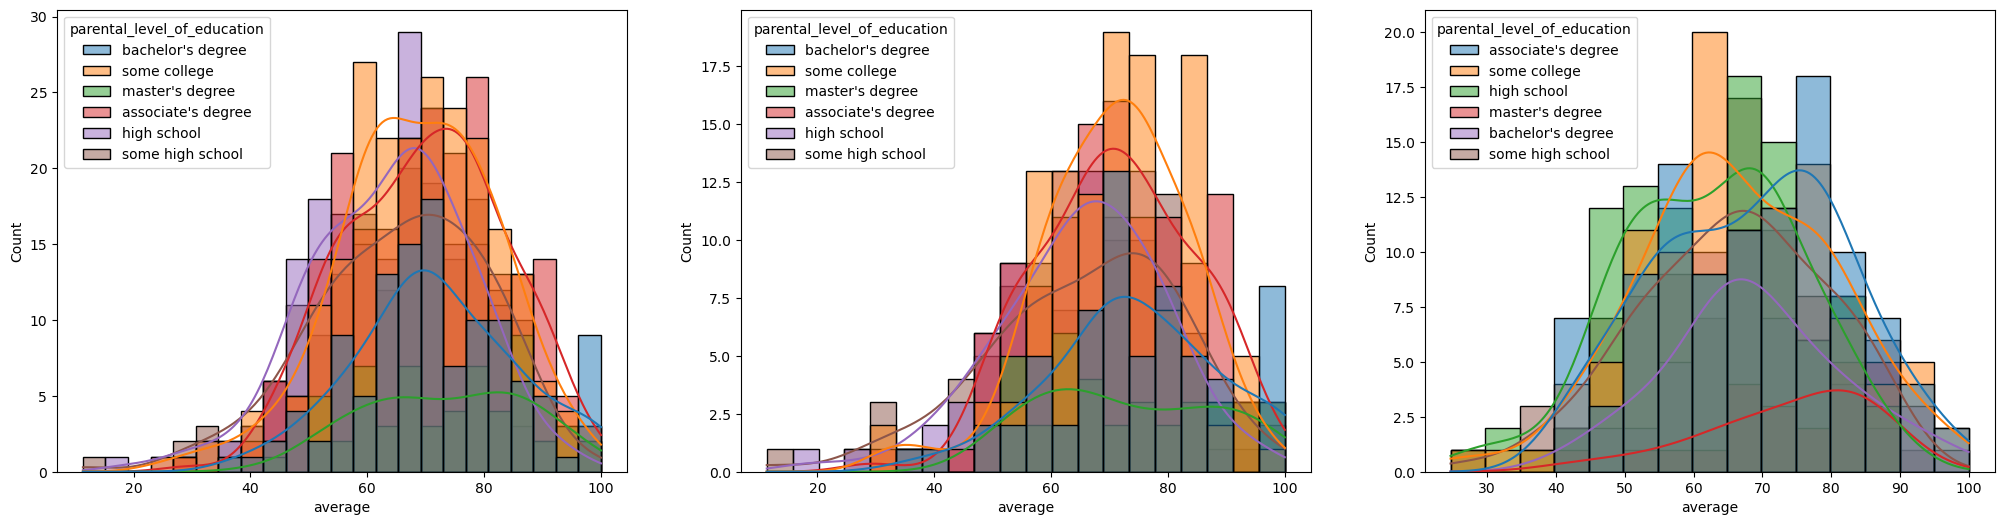

In [52]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')




### insights
- In general parent's education don't help student perfome well in exam 
- 3nd plot shows that parent's whose educations is of associate's degree or master's degree their male child tend to perfome well in exam.
- 2rd plot we can see there is no effect of parents's education on female students.

<AxesSubplot: xlabel='average', ylabel='Count'>

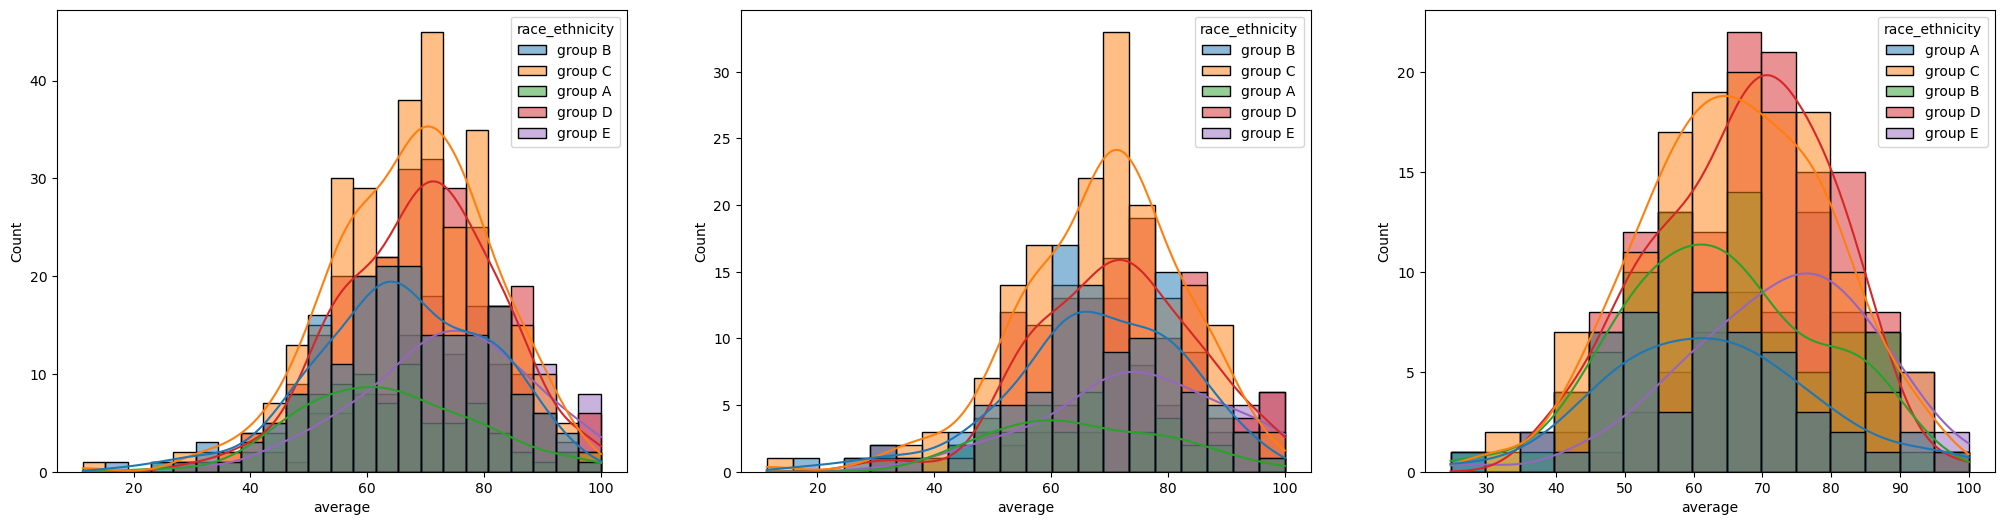

In [53]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race_ethnicity')




## Insights
- students of group A and groups B tends to perfome poorly in exam.
- Students of groups A and groups B tends to perfome in exam irrespective they are mele or female.

<AxesSubplot: >

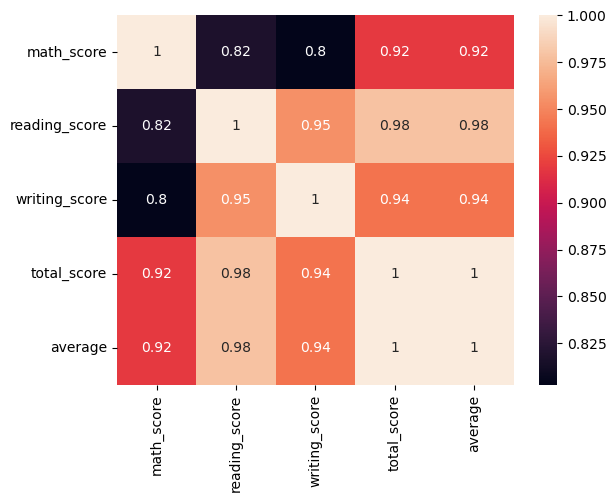

In [54]:
sns.heatmap(df.corr(), annot=True)